# PARTE II
Agora que tratamos os dados e fizemo a análise exploratória, vamos partir para a construção do modelo.

## Objetivo Principal
Desenvolver um modelo para prever o tempo de entrega de delirevy de restaurantes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importanto o dataset de treino
df_treino = pd.read_csv('data/data_modelo.csv', sep = ',')

display(df_treino)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,...,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Avaliacao,vehicle_ratio,vehicle_rarity
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,...,0,1,0,0,0,0,1,3,0.582301,0.583319
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,...,0,0,1,0,0,0,1,2,0.335302,0.334242
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,...,0,1,0,0,1,0,0,2,0.579375,0.583319
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,...,0,1,0,1,0,0,0,3,0.588258,0.583319
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,...,0,0,1,0,0,0,1,3,0.335302,0.334242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,1178,RANCHIRES16DEL01,35,4.2,23.371292,85.327872,23.481292,85.437872,Drinks,motorcycle,...,0,1,0,0,1,0,0,2,0.579375,0.583319
41469,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,...,0,1,0,0,0,1,0,3,0.583398,0.583319
41470,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,...,0,0,1,0,1,0,0,3,0.336751,0.334242
41471,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,...,0,1,0,0,0,0,1,3,0.582301,0.583319


In [3]:
# Função que personaliza o método describe() do pandas 
# É necessário instalar o pacote jinja2 (pip install jinja2)
def descricão(df):
    resumo = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes.values,
        'Quantidade de Dados Não Vazios': df.notna().sum().values,
        'Quantidade de Dados Vazios': df.isna().sum().values,
        'Valores Únicos': df.nunique(),
        'Porcentagem de Valor Vazios (%)': (df.isna().mean() * 100).round(2).values
        
    })

    styled = (resumo.style
        .set_properties(**{
            'background-color': "#0f010194", 
            'border-color': 'black',
            'text-align': 'center'
        })
        .background_gradient(subset=['Porcentagem de Valor Vazios (%)'], cmap='Reds')
        .bar(subset=['Quantidade de Dados Vazios'], color='lightblue')
        .set_table_styles([
            {
                'selector': 'th',
                'props': [
                    ('background-color', '#0d253f'),
                    ('color', 'white'),
                    ('text-align', 'center'),
                    ('font-size', '12px')
                ]
            }
        ])
    )
    return styled


In [4]:
descricão(df_treino)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Valores Únicos,Porcentagem de Valor Vazios (%)
ID,ID,object,41473,0,41287,0.000000
Delivery_person_ID,Delivery_person_ID,object,41473,0,1170,0.000000
Delivery_person_Age,Delivery_person_Age,int64,41473,0,20,0.000000
Delivery_person_Ratings,Delivery_person_Ratings,float64,41473,0,26,0.000000
Restaurant_latitude,Restaurant_latitude,float64,41473,0,388,0.000000
Restaurant_longitude,Restaurant_longitude,float64,41473,0,388,0.000000
Delivery_location_latitude,Delivery_location_latitude,float64,41473,0,4360,0.000000
Delivery_location_longitude,Delivery_location_longitude,float64,41473,0,4360,0.000000
Type_of_order,Type_of_order,object,41473,0,4,0.000000
Type_of_vehicle,Type_of_vehicle,object,41473,0,4,0.000000


Excluindo as features que não serão usadas

In [5]:
# Elimina as colunas que não serão utilizadas
df_treino = df_treino.drop(['ID', 'Delivery_person_ID', 'Type_of_order', 'Type_of_vehicle', 'rating_categoria'], axis=1)

In [6]:
display(df_treino)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Avaliacao,vehicle_ratio,vehicle_rarity
0,37,4.9,22.745049,75.892471,22.765049,75.912471,24,3.023250,0,0,1,0,0,0,0,1,3,0.582301,0.583319
1,34,4.5,12.913041,77.683237,13.043041,77.813237,33,20.170858,0,0,0,1,0,0,0,1,2,0.335302,0.334242
2,23,4.4,12.914264,77.678400,12.924264,77.688400,26,1.551783,0,0,1,0,0,1,0,0,2,0.579375,0.583319
3,38,4.7,11.003669,76.976494,11.053669,77.026494,21,7.785510,0,0,1,0,1,0,0,0,3,0.588258,0.583319
4,32,4.6,12.972793,80.249982,13.012793,80.289982,30,6.206239,0,0,0,1,0,0,0,1,3,0.335302,0.334242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,35,4.2,23.371292,85.327872,23.481292,85.437872,33,16.589850,0,0,1,0,0,1,0,0,2,0.579375,0.583319
41469,30,4.8,26.902328,75.794257,26.912328,75.804257,32,1.488910,0,0,1,0,0,0,1,0,3,0.583398,0.583319
41470,30,4.9,13.022394,80.242439,13.052394,80.272439,16,4.654271,0,0,0,1,0,1,0,0,3,0.336751,0.334242
41471,20,4.7,11.001753,76.986241,11.041753,77.026241,26,6.228480,0,0,1,0,0,0,0,1,3,0.582301,0.583319


In [7]:
# Divisão entre treino e teste
from sklearn.model_selection import train_test_split

# Divisão entre target e o que será usado no modelo
X = df_treino.drop(['Time_taken(min)'], axis=1)
y = df_treino['Time_taken(min)']

# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
# Função de Treinamento e Gráficos
def treinar_modelo(modelo, X_train, y_train, y_test, titulo):
    """
    Treina o modelo. calcula previsões e reterno com graficos 
    """

    # Treino
    modelo.fit(X_train, y_train)

    # Previsão
    y_pred = modelo.predict(X_test)

    # Criação dos gráficos
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # Título central da figura
    fig.suptitle(
        #'Avaliação do Modelo — {modelo.__class__.name__}',
        titulo,
        fontsize=16,
        fontweight='bold'
    )

    # Gráfico 1 — Predito vs Real
    ax[0].scatter(y_test, y_pred, alpha=0.6)
    ax[0].plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        linestyle='--',
        color='r'
    )

    ax[0].set_xlabel('Tempo Real (min)')
    ax[0].set_ylabel('Tempo Predito (min)')
    ax[0].set_title('Predito vs Real')


    # Gráfico 2 — Resíduos vs Valor Real
    residuos = y_test - y_pred

    ax[1].scatter(y_test, residuos, alpha=0.6)
    ax[1].axhline(0, linestyle='--', color='r')

    ax[1].set_xlabel('Tempo Real (min)')
    ax[1].set_ylabel('Resíduo')
    ax[1].set_title('Resíduos vs Valor Real')


    # Gráfico 3 — Distribuição dos Resíduos
    sns.histplot(
        residuos,
        bins=30,
        kde=True,
        alpha=0.7,
        ax=ax[2]       
    )

    ax[2].set_xlabel('Resíduo')
    ax[2].set_ylabel('Frequência')
    ax[2].set_title('Distribuição dos Resíduos')


    plt.tight_layout()
    plt.show()


# Métricas de Avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error

def regression_metrics(modelo_nome, model,y_test, X_train):
    # Previsão
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmsle = mean_squared_log_error(y_test, y_pred)

    adj_r2 = 1 - ((1 - r2) * (len(y_test) - 1)) / (len(y_test) - X_train.shape[1] - 1)

    return {
        'Modelo': modelo_nome,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'R² Ajustado': adj_r2,
        'MAPE (%)': mape,
        'RMSLE': rmsle
    }

# Pedido de Sarah
- ~~Lightgbm~~
- ~~Catboost~~
- ~~Xgboost~~
- Ajuste de Hiperparâmentros com o optuna e Seleção de variáveis, tenta ver algo como boruta, MRMR

# LinearRegression

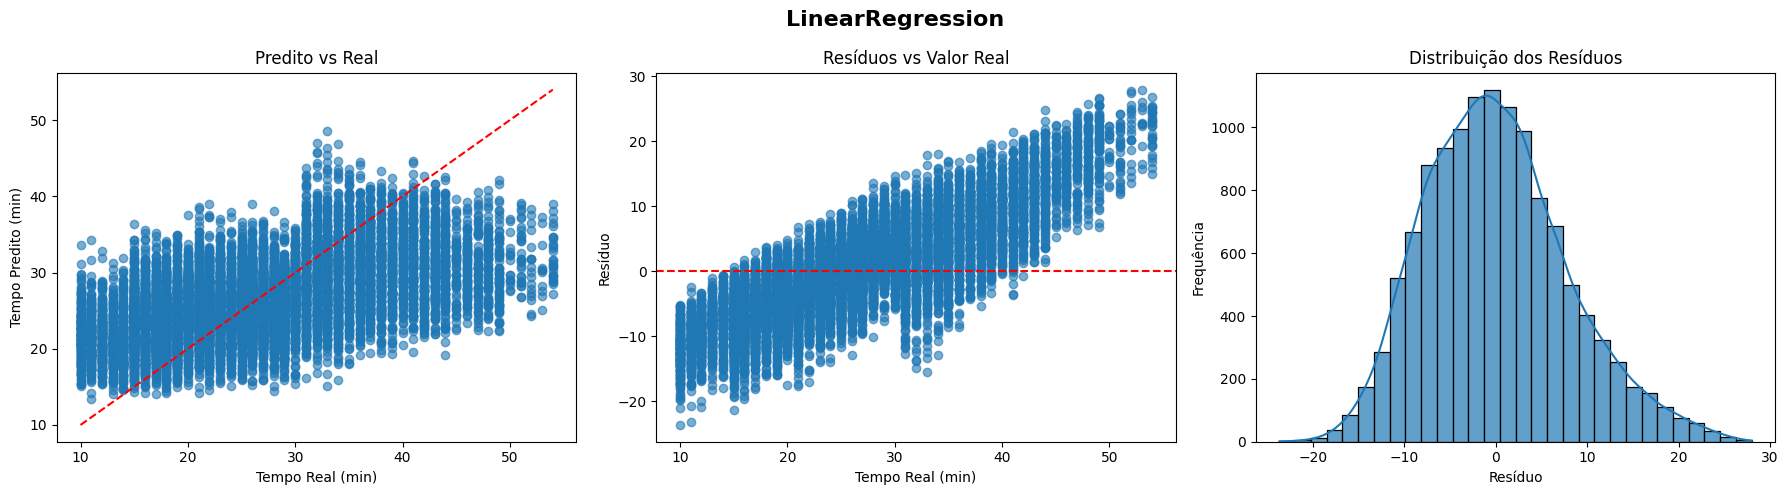

In [9]:
# Import dos modelos e metrícas de avaliação
from sklearn.linear_model import LinearRegression

# Model e fit
model_linear_reg = LinearRegression()

treinar_modelo(model_linear_reg, X_train, y_train, y_test, titulo='LinearRegression')

In [ ]:
metrics = []

metrics.append(
    regression_metrics(
        modelo_nome='LinearRegression',
        model=model_linear_reg,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.22206,61.211458,7.823775,0.304665,0.303658,27.476178,0.090868


# Lightgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 29031, number of used features: 18
[LightGBM] [Info] Start training from score -4.085804
[LightGBM] [Info] Start training from score -4.085804
[LightGBM] [Info] Start training from score -4.129790
[LightGBM] [Info] Start training from score -4.162437
[LightGBM] [Info] Start training from score -4.155822
[LightGBM] [Info] Start training from score -3.262204
[LightGBM] [Info] Start training from score -3.264906
[LightGBM] [Info] Start training from score -3.277610
[LightGBM] [Info] Start training from score -3.232087
[LightGBM] [Info] Start training from score -3.234708
[LightGBM] [Info] Start tra

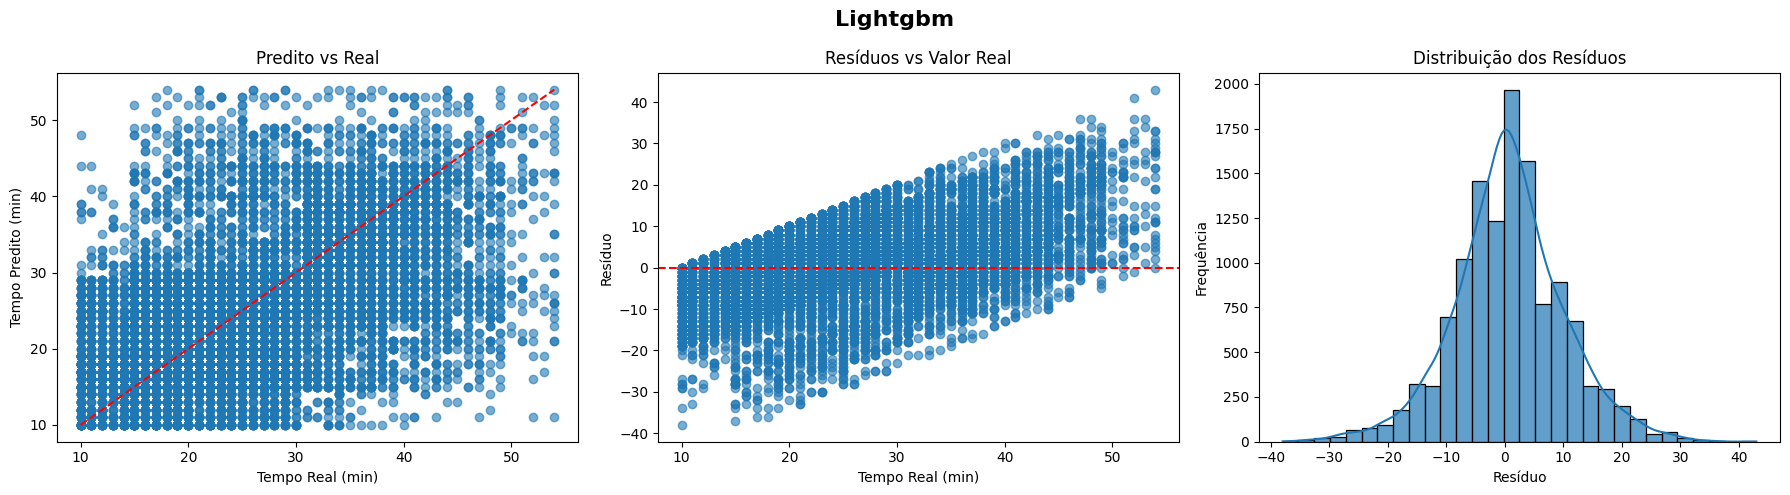

In [11]:
# Importanto a biblioteca do Lightgbm
import lightgbm as lgb

# Model e fit
model_lgbm = lgb.LGBMClassifier()

treinar_modelo(model_lgbm, X_train, y_train, y_test, titulo='Lightgbm')

In [12]:
metrics.append(
    regression_metrics(
        modelo_nome='Lightgbm',
        model=model_lgbm,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.222060,61.211458,7.823775,0.304665,0.303658,27.476178,0.090868
1,Lightgbm,7.199566,90.770857,9.527374,-0.031116,-0.032610,30.470104,0.137033


# RandomForestRegressor

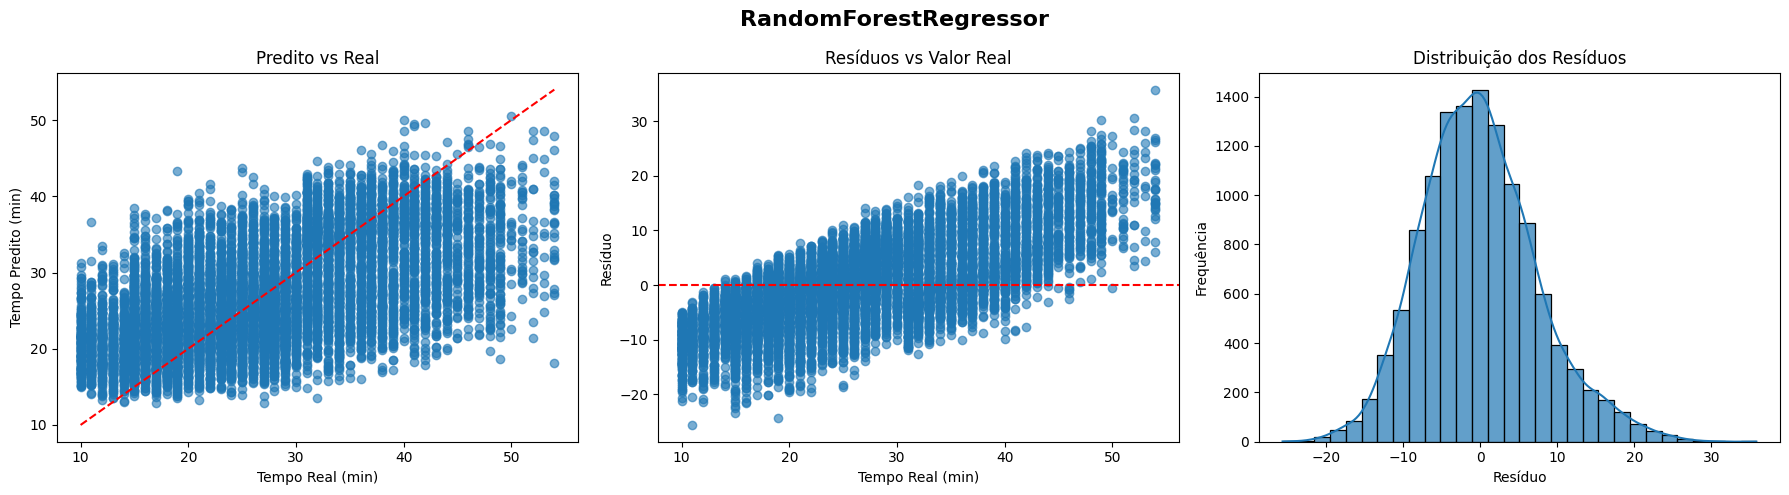

In [13]:
# Importanto a biblioteca do RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Model e fit
model_forest = RandomForestRegressor()

treinar_modelo(model_forest, X_train, y_train, y_test, titulo='RandomForestRegressor')

In [14]:
metrics.append(
    regression_metrics(
        modelo_nome='RandomForestRegressor',
        model=model_forest,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.222060,61.211458,7.823775,0.304665,0.303658,27.476178,0.090868
1,Lightgbm,7.199566,90.770857,9.527374,-0.031116,-0.032610,30.470104,0.137033
2,RandomForestRegressor,5.937709,57.338230,7.572201,0.348663,0.347720,26.168036,0.086369


# XGBoost

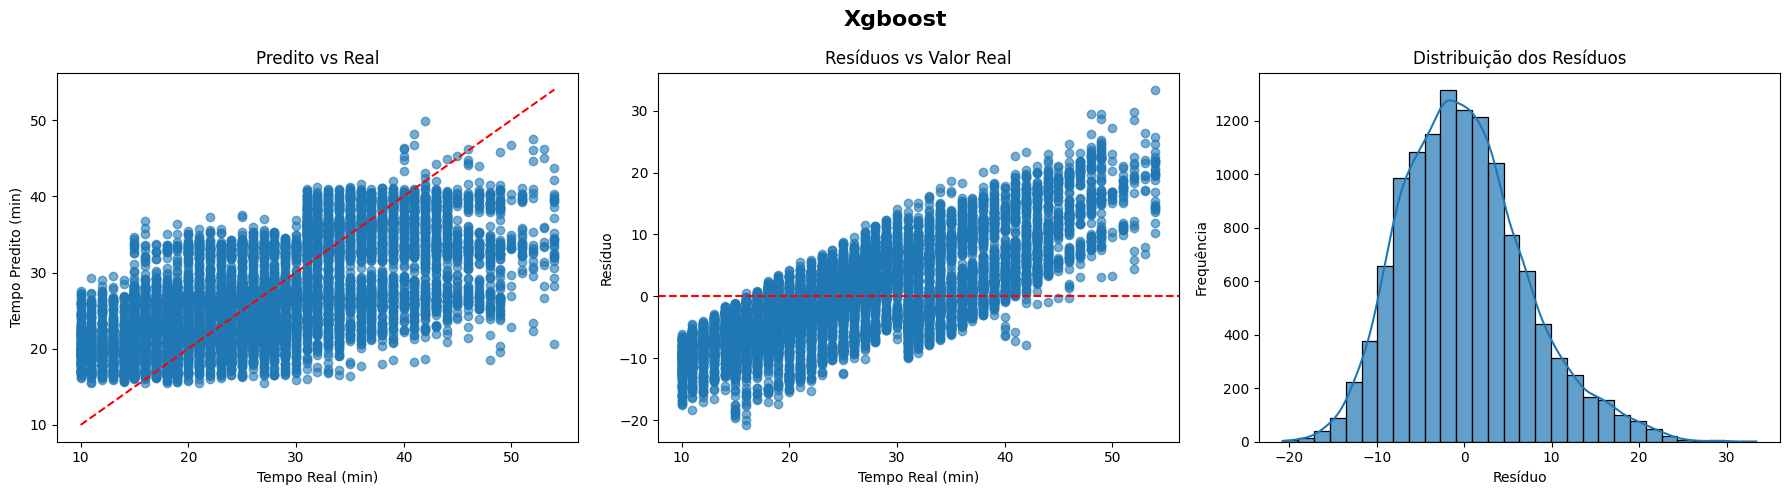

In [15]:
# Importanto a biblioteca do XGBRegressor
import xgboost as xgb

# Você pode ajustar parâmetros como:
# objective='reg:squarederror' especifica que estamos resolvendo um problema de regressão com erro quadrático médio (MSE)
# n_estimators: O número de árvores a serem construídas (mais árvores podem melhorar a performance, mas podem aumentar o tempo de treinamento).
# learning_rate: A taxa de aprendizado (controla o impacto de cada árvore).
# max_depth: A profundidade máxima das árvores (um valor maior pode aumentar a capacidade do modelo de capturar padrões complexos, mas pode causar overfitting).

# Model e fit
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)

treinar_modelo(model_xgb, X_train, y_train, y_test, titulo='Xgboost')

In [16]:
metrics.append(
    regression_metrics(
        modelo_nome='Xgboost',
        model=model_xgb,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.222060,61.211458,7.823775,0.304665,0.303658,27.476178,0.090868
1,Lightgbm,7.199566,90.770857,9.527374,-0.031116,-0.032610,30.470104,0.137033
2,RandomForestRegressor,5.937709,57.338230,7.572201,0.348663,0.347720,26.168036,0.086369
3,Xgboost,5.663049,51.615772,7.184412,0.413668,0.412818,24.939776,0.078018


# Catboost

Learning rate set to 0.069713
0:	learn: 9.1346210	total: 48.7ms	remaining: 48.7s
1:	learn: 8.9125202	total: 50.3ms	remaining: 25.1s
2:	learn: 8.7217977	total: 51.9ms	remaining: 17.2s
3:	learn: 8.5518048	total: 53.4ms	remaining: 13.3s
4:	learn: 8.3963892	total: 54.8ms	remaining: 10.9s
5:	learn: 8.2633985	total: 56.3ms	remaining: 9.33s
6:	learn: 8.1459379	total: 57.7ms	remaining: 8.18s
7:	learn: 8.0399610	total: 59.1ms	remaining: 7.32s
8:	learn: 7.9424470	total: 60.5ms	remaining: 6.66s
9:	learn: 7.8546162	total: 61.7ms	remaining: 6.11s
10:	learn: 7.7802916	total: 63ms	remaining: 5.66s
11:	learn: 7.7177464	total: 64.3ms	remaining: 5.29s
12:	learn: 7.6631194	total: 65.4ms	remaining: 4.97s
13:	learn: 7.6118399	total: 66.7ms	remaining: 4.7s
14:	learn: 7.5707130	total: 68.8ms	remaining: 4.51s
15:	learn: 7.5309251	total: 70.1ms	remaining: 4.31s
16:	learn: 7.4974432	total: 71.3ms	remaining: 4.12s
17:	learn: 7.4646227	total: 72.5ms	remaining: 3.95s
18:	learn: 7.4349555	total: 73.7ms	remaining: 3

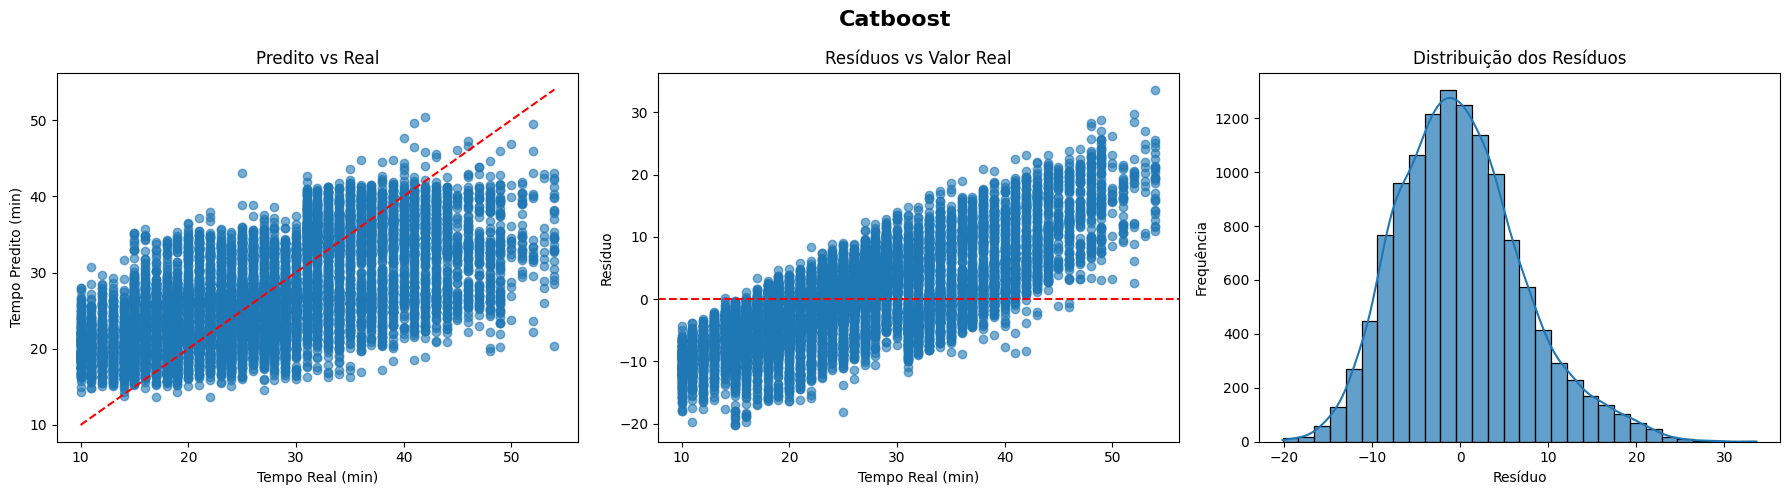

In [17]:
import catboost as cb

#Modelo
model_cat = cb.CatBoostRegressor()

treinar_modelo(model_cat, X_train, y_train, y_test, titulo='Catboost')

In [18]:
metrics.append(
    regression_metrics(
        modelo_nome='Catboost',
        model=model_cat,
        y_test=y_test,
        X_train=X_train
    )
)

df_metrics = pd.DataFrame(metrics)
df_metrics

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.222060,61.211458,7.823775,0.304665,0.303658,27.476178,0.090868
1,Lightgbm,7.199566,90.770857,9.527374,-0.031116,-0.032610,30.470104,0.137033
2,RandomForestRegressor,5.937709,57.338230,7.572201,0.348663,0.347720,26.168036,0.086369
3,Xgboost,5.663049,51.615772,7.184412,0.413668,0.412818,24.939776,0.078018
4,Catboost,5.693958,52.306711,7.232338,0.405819,0.404958,25.031840,0.078848


In [36]:
df_metrics.style.background_gradient(cmap='Blues').set_table_styles(
    [{
        'selector': 'th', # 'th' seleciona as células do cabeçalho
        'props': [('text-align', 'center')]
    }]
).set_properties(subset=['Modelo'],**{'text-align': 'center'})

,Modelo,MAE,MSE,RMSE,R²,R² Ajustado,MAPE (%),RMSLE
0,LinearRegression,6.222060,61.211458,7.823775,0.304665,0.303658,27.476178,0.090868
1,Lightgbm,7.199566,90.770857,9.527374,-0.031116,-0.032610,30.470104,0.137033
2,RandomForestRegressor,5.937709,57.338230,7.572201,0.348663,0.347720,26.168036,0.086369
3,Xgboost,5.663049,51.615772,7.184412,0.413668,0.412818,24.939776,0.078018
4,Catboost,5.693958,52.306711,7.232338,0.405819,0.404958,25.031840,0.078848
